<a href="https://colab.research.google.com/github/Supriyo186/ML-MAJOR-APRIL-ML-04-BS1/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Gathering Data :


In [1]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Machine Learning - Smartknowers/Major Project/IMDB Dataset.csv')


In [2]:
#Visualizing the data before preprocessing:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df=df.iloc[:1000,:]
df.shape

(999, 2)

Preprocesssing of Data :

In [4]:
#Downloading Stopword list for English language
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


177

In [5]:
import requests
from bs4 import BeautifulSoup

#Remove HTML tag:
def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text

#Expand Contractions:
!pip install contractions --quiet
import contractions
def con(text):
  expand = contractions.fix(text)
  return expand
con("Y'all can't expand I'd think")

#Remove Special Characters:
import re
def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text

#Remove Stopwords:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list] 
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

     |████████████████████████████████| 327kB 5.1MB/s 
     |████████████████████████████████| 286kB 37.7MB/s 


In [6]:
df.review = df.review.apply(lambda x:x.lower())
df.review = df.review.apply(html_tag)
df.review = df.review.apply(con)
df.review = df.review.apply(remove_sp)
df.review = df.review.apply(remove_stopwords)

In [7]:
#Visualizing the data after preprocessing:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


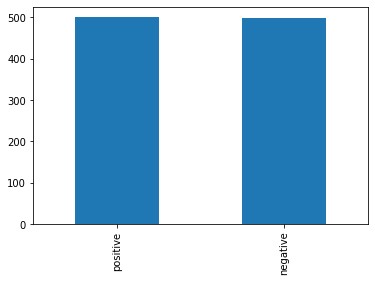

In [8]:
df['sentiment'].value_counts().plot(kind='bar')


In [9]:
#Dividing the data:

#Input
x=df['review'].values 
#Output
y=df['sentiment'].values


In [10]:
#Splitting the data into training and testing parts:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


Vectorization (TFIDF Vectorizer) :

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

Creating Model Using SVC :


In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positi

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_pred,y_test)


0.824

In [16]:
confusion_matrix(y_pred,y_test)

array([[ 99,  15],
       [ 29, 107]])

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.77      0.87      0.82       114
    positive       0.88      0.79      0.83       136

    accuracy                           0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250



In [18]:
# Evaluating for a specific message
text = df['review'][10]
print(text)
text=vect.transform([text])
model.predict(text)

phil alien one quirky films humour based around oddness everything rather actual punchlinesat first odd pretty funny movie progressed not find jokes oddness funny anymoreits low budget film never problem pretty interesting characters eventually lost interesti imagine film would appeal stoner currently partakingfor something similar better try brother another planet


array(['negative'], dtype=object)

Pipelining :

In [19]:
from sklearn.pipeline import Pipeline

text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])
text_model.fit(x_train,y_train)
y_pred=text_model.predict(x_test)

In [20]:
# Evaluating for a specific message
text = df['review'][10]
text_model.predict([text])

array(['negative'], dtype=object)

In [21]:
import joblib
joblib.dump(text_model,'sentiment_analyzer_model')

['sentiment_analyzer_model']

Creating a Web App Using Streamlit for Deployment:

In [22]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.2MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 4.2MB 39.4MB/s 
     |████████████████████████████████| 174kB 49.5MB/s 
     |████████████████████████████████| 112kB 49.1MB/s 
     |████████████████████████████████| 122kB 47.2MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=4eca0bca73628fadcfe7846751e43c7bd0c170383343df7fcb1fc87c8b13576a
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [23]:
%%writefile app.py
import streamlit as st
import joblib 
model=joblib.load('sentiment_analyzer_model')
st.title('Sentiment Analyzer')
ip = st.text_input("Enter the Review")
op = model.predict([ip])
if st.button('Predict'):
  st.write('RESULT:')
  st.title('Predicted Sentiment : '+op[0])

Writing app.py


In [24]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://e8ca3e61ab55.ngrok.io'